# Model Evaluation

1. Data Preparation

Data preparation is like getting all the ingredients ready before cooking. It involves cleaning the data (removing or fixing any errors or missing values), normalizing or standardizing it (so all features have similar scales), and sometimes augmenting it (adding more data through transformations). For the MVTec AD dataset, this might include resizing images, converting them to grayscale or color, and ensuring that each image is labeled correctly.

2. Train - Test Split

This step involves dividing your dataset into two parts: one for training your model (train set) and one for testing it (test set). It's like studying for an exam using a portion of the material (training) and then testing your knowledge on a different set of questions (testing). Typically, 70-80% of the data is used for training, and the rest for testing. This helps in evaluating how well your model will perform on unseen data.

3. Model Training

Model training is where the magic happens. The training data is fed into the machine learning algorithm, which learns patterns and relationships within the data. This is similar to learning from examples and improving your skills over time. For anomaly detection, the model learns what normal (non-anomalous) data looks like, so it can identify what doesn’t fit that pattern.

4. Model Evaluation using Metrics

After training, you need to evaluate how well your model performs. This involves using metrics like accuracy, precision, recall, F1-score, etc. It’s like getting a report card that tells you how well you did. Each metric provides different insights:

- **Accuracy**: How many predictions were correct overall.
- **Precision**: Out of all the predicted anomalies, how many were actual anomalies. Higher precision means fewer false positives
- **Recall**: true positive rate - Out of all actual anomalies, how many were correctly predicted. Higher recall means fewer false negatives
- **F1-score**: A balance between precision and recall.

5. Cross-Validation

Cross-validation is a technique to make sure your model's performance is robust and not dependent on a particular train-test split. It involves dividing the data into multiple folds (subsets) and training/testing the model multiple times, each time with a different fold as the test set and the remaining folds as the training set. This is like taking multiple mock exams to ensure you're consistently good and not just lucky once.

6. Confusion Matrix

A confusion matrix is a table that summarizes the performance of a classification model. It shows the counts of 
- **true positive** (correctly identified anomalies), 
- **true negative** (correctly identified normal data), 
- **false positive** (normal data incorrectly labeled as anomalies). (Type I error).
- **false negative** (anomalies incorrectly labeled as normal). (Type II error).

It’s a detailed report card that shows where the model is getting things right and where it’s making mistakes.

7. Precision-Recall Curve

The precision-recall curve is a graph that shows the trade-off between precision and recall for different threshold settings. Higher precision means fewer false positives, and higher recall means fewer false negatives. The curve helps in understanding the balance between precision and recall and finding an optimal threshold for your specific application.

8. ROC Curve

The ROC (Receiver Operating Characteristic) curve is another graph that shows the trade-off between true positive rate (recall) and false positive rate. The area under the ROC curve (AUC) provides a single measure of the model’s performance. A model with an AUC close to 1 indicates a good model, while an AUC close to 0.5 suggests a model no better than random guessing. It’s like a comprehensive score that tells you how well your model distinguishes between anomalies and normal data.

1. Data Preparation 
2. Train - Test Split 
3. Model Training 
4. Model Evaluation using Metrics 
5. Cross - Validation 
6. Confuion Matrix 
7. Precision- Recall Curve 
8. ROC Curve 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import(accuracy_score, precision_score, f1_score, confusion_matrix, 
                            precision_recall_curve,recall_score,
                    roc_curve, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score)

from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.linear_model import LogisticRegression, LinearRegression

C:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True

Regression Metrics: 
1. MSE 
2. MAE 
3. RMSE 
4. R2 score : value ranges between 0 and 1 


Classification Metrics: 
1. Accuracy : values are correctly classified 
2. Precision: 10 - 5 M and 5 F - how many are relevant from selected  
3. Recall(senstivity): how many relevants items are selected 
4. F1 - score: for imabalanced dataset - make balance precision and recall 
5. ROC (Receiver operating Characteristics) and AUC (Area Under Curve): 0.5 to 1 



## 2. Train - Test Split

In [2]:
#IRIS DATASET
# Train - Test Split 
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

In [3]:
#HOUSING DATASET 
#Train - Test Split 
house = fetch_california_housing()
X_house = house.data
y_house = house.target

# Split into training and testing sets
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(X_house, 
                                                                                y_house, 
                                                                                test_size=0.2,
                                                                                random_state=42)


## 3. Model Training

In [4]:
# Train Logistic Regression model
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_iris, y_train_iris)

# Predict on test set
y_pred_iris = clf.predict(X_test_iris)

In [5]:
# Train Linear Regression model
reg = LinearRegression()
reg.fit(X_train_house, y_train_house)

# Predict on test set
y_pred_house = reg.predict(X_test_house)

## 4. Model Evaluation using Metrics

### Classification

1. **Accuracy**
- Definition: The ratio of correctly predicted instances to the total number of instances.
- Use: Good for balanced datasets but can be misleading if classes are imbalanced.

2. **Precision**
- Definition: The ratio of true positive predictions to the total number of positive predictions (true positives + false positives).
- Use: Important when the cost of false positives is high, such as in spam detection.

3. **Recall (Sensitivity, True Positive Rate)**
- Definition: The ratio of true positive predictions to the total number of actual positives (true positives + false negatives).
- Use: Crucial when missing positive instances is costly, such as in medical diagnoses.

4. **F1-Score**
- Definition: The harmonic mean of precision and recall. It balances both metrics and provides a single score.
- Use: Useful when you need a balance between precision and recall.

5. **Confusion matrix**
- Definition: A table showing the counts of true positives, true negatives, false positives, and false negatives.
- Use: Helps visualize performance and understand where the model makes errors.

6. **ROC Curve and AUC**
- ROC Curve: A graph plotting the true positive rate (recall) against the false positive rate at various threshold settings.
- AUC (Area Under Curve): The area under the ROC curve, which summarizes the model’s ability to distinguish between classes. An AUC close to 1 indicates a good model.

7. **Precision-Recall Curve**
- PR Curve: A graph showing the trade-off between precision and recall for different threshold settings.
- Use: Especially useful for imbalanced datasets to evaluate the model’s performance across different levels of precision and recall.

### Regression Metrics
- Regression metrics are used to evaluate models that predict continuous outcomes (e.g., predicting house prices). Here are some common metrics:

1. **Mean Absolute Error (MAE)**
- Definition: The average absolute differences between predicted and actual values.
- Use: Gives a straightforward measure of prediction accuracy in the same units as the target variable.

2. **Mean Squared Error (MSE)**
- Definition: The average of the squared differences between predicted and actual values.
- Use: Penalizes larger errors more heavily due to squaring, making it sensitive to outliers.

3. **Root Mean Squared Error (RMSE)**
- Definition: The square root of the mean squared error. It brings the error measure back to the same units as the target variable.
- Use: Useful when you need to understand the magnitude of prediction errors in the same units as the target variable.

4. **R-Squared (R²)**
- Definition: The proportion of variance in the target variable that is predictable from the features.
- Use: Indicates how well the model explains the variability of the target variable. R² values range from 0 to 1, with higher values indicating better model performance.

5. **Adjusted R-Squared**
- Definition: A modified version of R² that adjusts for the number of predictors in the model.
- Use: Useful for comparing models with different numbers of predictors.

In [6]:
#Classification Metrics 

accuracy = accuracy_score(y_test_iris,y_pred_iris)
precision = precision_score(y_test_iris,y_pred_iris, average = 'weighted')
recall = recall_score(y_test_iris,y_pred_iris, average = 'weighted')
f1 = f1_score(y_test_iris,y_pred_iris, average = 'weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {accuracy}")
print(f"Recall: {accuracy}")
print(f"F1: {accuracy}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [7]:
#Regression Metrics 

mse = mean_squared_error(y_test_house,y_pred_house)
rmse = mean_squared_error(y_test_house,y_pred_house, squared = False)
mae = mean_absolute_error(y_test_house,y_pred_house)
r2 = r2_score(y_test_house,y_pred_house)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.555891598695242
RMSE: 0.7455813830127748
MAE: 0.5332001304956981
R2: 0.5757877060324526


## 5. Cross Validation

In [8]:
#Classification CV 

cv_score = cross_val_score(clf, X_iris, y_iris, cv=5)
print(f"Cross Validation Score: {cv_score}")
print(f"Mean CV Score: {cv_score.mean()}")

Cross Validation Score: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Score: 0.9733333333333334


In [9]:
#Regression CV 

cv_scores = cross_val_score(reg, X_house, y_house, cv=5, scoring = 'neg_mean_squared_error')
print(f"Cross Validation Regression Score: {cv_scores}")
print(f"Mean Regression CV Score: {cv_scores.mean()}")

Cross Validation Regression Score: [-0.48485857 -0.62249739 -0.64621047 -0.5431996  -0.49468484]
Mean Regression CV Score: -0.5582901717686809


## 6. Confusion Matrix

- True Positive (TP): Correctly predicted positive instances.
- True Negative (TN): Correctly predicted negative instances.
- False Positive (FP): Incorrectly predicted positive instances (Type I error).
- False Negative (FN): Incorrectly predicted negative instances (Type II error).

<function matplotlib.pyplot.show(close=None, block=None)>

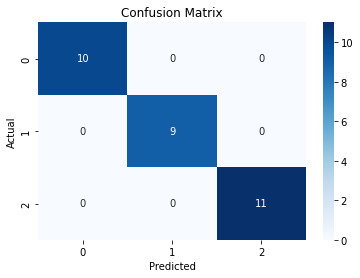

In [10]:
#Classification 
cm = confusion_matrix(y_test_iris, y_pred_iris)
sns.heatmap(cm, annot= True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

## 7. Precision_Recall_Score 

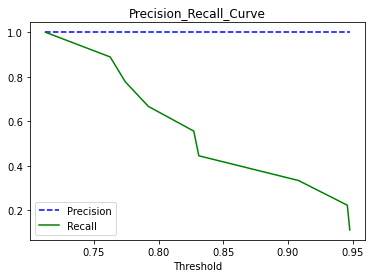

In [11]:
#Predict the probabilities for positive class 
y_scores = clf.predict_proba(X_test_iris)[:, 1]

#P-R pair for different threshold 
pre, recall, thresholds = precision_recall_curve(y_test_iris, y_scores, pos_label=1)


plt.plot(thresholds, pre[:-1], 'b--', label = "Precision")
plt.plot(thresholds, recall[:-1], 'g-', label = "Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.title("Precision_Recall_Curve")
plt.show()

The Precision-Recall curve provides insight into the performance of a classification model, especially in situations where class imbalance is present. In your plot for the Iris dataset, we can deduce the following:

Precision: The dashed blue line represents precision. In this plot, precision appears to stay constant at around 1.0 (or very close to it) across different threshold values. This suggests that when the model predicts the positive class, it is almost always correct.

Recall: The solid green line represents recall. Recall starts high and gradually decreases as the threshold increases. This indicates that the model initially identifies most of the positive instances but starts missing them as the threshold for classifying an instance as positive increases.

Threshold: The x-axis represents different threshold values. As the threshold increases, fewer instances are classified as positive, which typically decreases recall and may affect precision.

Trade-off: The plot illustrates the trade-off between precision and recall. To achieve high recall, the threshold is low, capturing more true positives but potentially including more false positives. Conversely, a higher threshold improves precision but reduces recall as fewer positives are identified.

For the Iris dataset:

If your goal is to minimize false negatives (e.g., you care more about capturing all positive instances), you might choose a lower threshold, accepting some false positives.


8. ROC Curve

The ROC (Receiver Operating Characteristic) curve is another graph that shows the trade-off between true positive rate (recall) and false positive rate. The area under the ROC curve (AUC) provides a single measure of the model’s performance. A model with an AUC close to 1 indicates a good model, while an AUC close to 0.5 suggests a model no better than random guessing. It’s like a comprehensive score that tells you how well your model distinguishes between anomalies and normal data.